In [1]:
# Importando bibliotecas

import albumentations as A
import matplotlib.pyplot as plt
import torchvision 
import numpy as np
import torch

In [2]:
# Importando imagem

img = torchvision.io.read_image('Images/dog.jpeg')
img.shape

torch.Size([3, 224, 224])

In [3]:
# Modificando o corpo da imagem

img = img.permute(1, 2, 0)
img.shape

torch.Size([224, 224, 3])

In [4]:

# Função com as tranformações

aug_des = [
    'Blur transforms',
    'Center crop and resize',
    'RandomCrop and resize',
    'Elastic Transform',
    'Grid Distortion',
    'PixelDropout',
    'RandomRotate90',
    'RandomBrightnessContrast',
    'Geometric transforms',
    'ChannelDropout',
]

def aug(x):
    y=[]
    # Blur transforms
    transform = A.Blur(always_apply=True)
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # Center crop and resize
    transform = A.Compose([
        A.CenterCrop (150, 150, always_apply=False),
        A.Resize (224, 224, interpolation=1, always_apply=True) 
    ])
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # RandomCrop and resize
    transform = A.Compose([
        A.RandomCrop(150, 150, always_apply=False),
        A.Resize (224, 224, interpolation=1, always_apply=True) 
    ])
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # Elastic Transform
    transform = A.ElasticTransform(alpha=1, always_apply=True)
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # Grid Distortion
    transform = A.GridDistortion(always_apply=True) 
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # PixelDropout
    transform = A.PixelDropout (always_apply=True)
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # RandomRotate90
    transform = A.RandomRotate90(always_apply=True)
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # RandomBrightnessContrast
    transform = A.RandomBrightnessContrast(always_apply=True)
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # Geometric transforms
    transform = A.Affine(always_apply=True)
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))

    # ChannelDropout
    transform = A.ChannelDropout(always_apply=True)
    y.append(torch.from_numpy(transform(image=np.asanyarray(img))['image']))
    return y

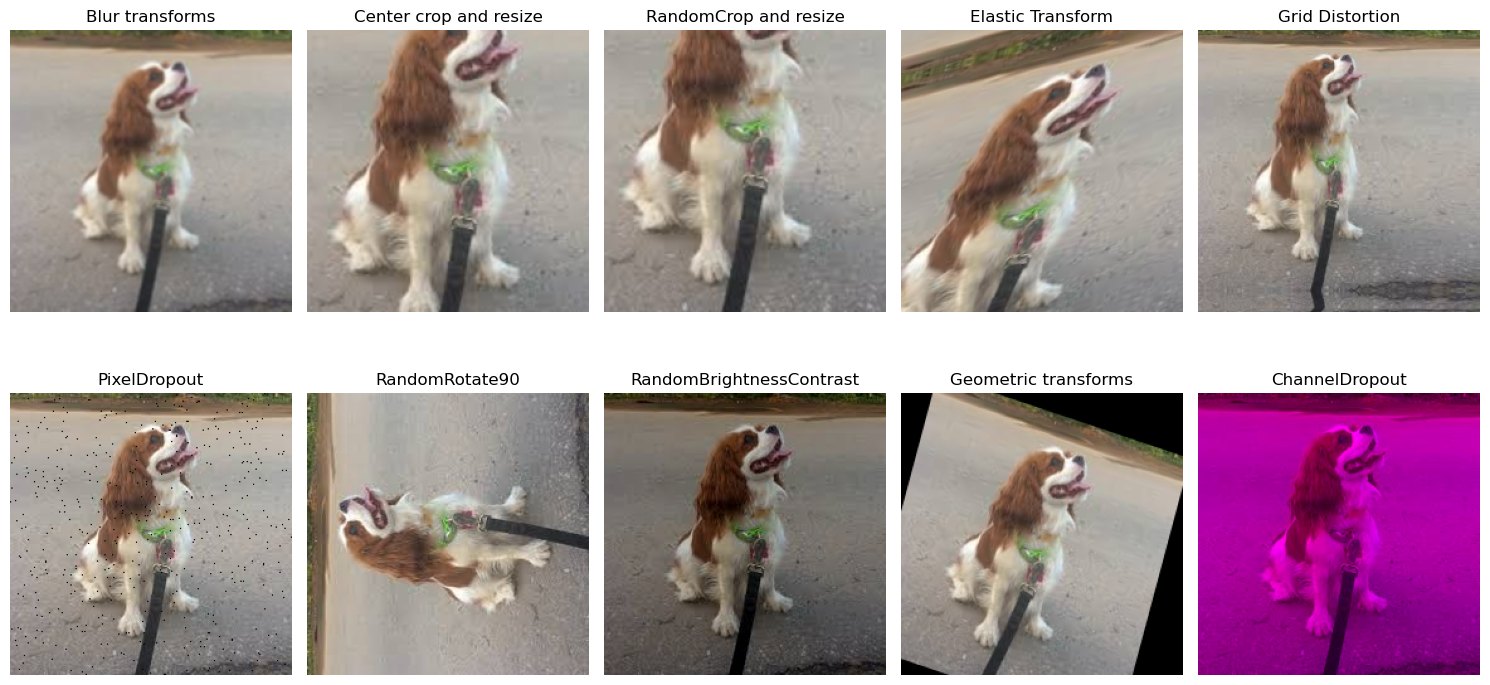

In [5]:
# Visualizando imagens aumentadas

aug_img = aug(img)
fig, axs = plt.subplots(2, 5, figsize=(15,8))
axs = axs.reshape(-1)
for idx in range(10):
    axs[idx].imshow(aug_img[idx])
    axs[idx].set_title(f'{aug_des[idx]}')
    axs[idx].set_axis_off()
plt.tight_layout()